# Task 1

Importing the libraries

In [ ]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt


Setting the params

In [ ]:
x = 17 # the number of samples which contained Giardia cysts
n = 116 # The overall number of samples
a_prior, b_prior = 1, 4 # alpha and beta of the prior distribution
a_post, b_post = x + 1, n - x + 4 # alpha and beta of the posterior distribution

In [ ]:

# Helper functions for finding distributions.

def prior_func(t):
  return beta.pdf(t, a_prior, b_prior)

def likelihood_func(t):
  return binom.pmf(x, n, t)

def post_func(t):
  return likelihood_func(t) * prior_func(t)

## Subtask 4

Plotting the prior pdf

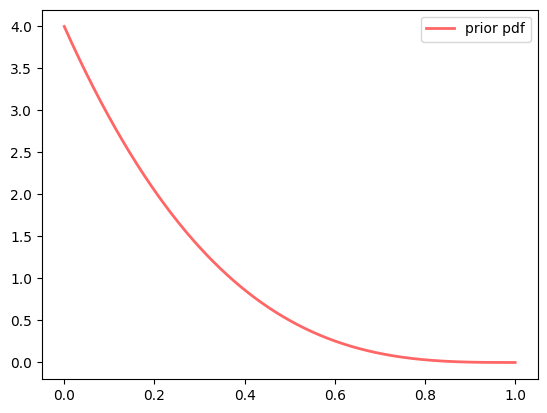

In [ ]:
fig, ax = plt.subplots(1, 1)
theta_grid = np.linspace(0, 1, 10000)
prior = prior_func(theta_grid)

ax.plot(theta_grid, prior,
       'r-', lw=2, alpha=0.6, label='prior pdf')
ax.legend()

Plotting the normalized likelihood pdf

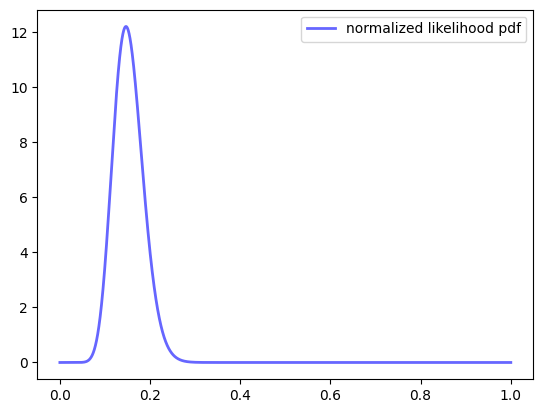

In [ ]:
from scipy.integrate import quad

fig, ax = plt.subplots(1, 1)
likelihood = likelihood_func(theta_grid)

I = quad(likelihood_func, 0, 1)
norm_likelihood = likelihood / I[0]

ax.plot(theta_grid, norm_likelihood,
       'b-', lw=2, alpha=0.6, label='normalized likelihood pdf')
ax.legend()

Plotting the posterior pdf

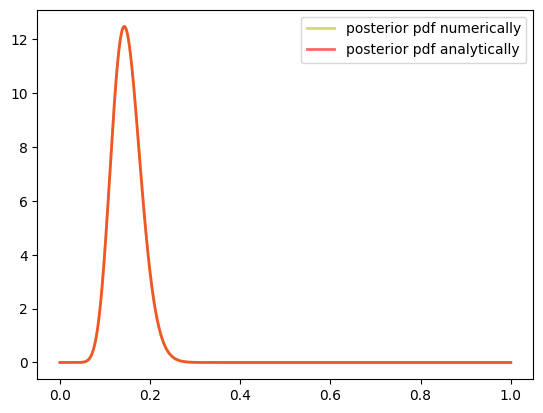

In [ ]:
fig, ax = plt.subplots(1, 1)
post1 = prior * likelihood

I = quad(post_func, 0, 1)

post1 = post1 / I[0] # The posterior numerically.
post2 = beta.pdf(theta_grid, a_post, b_post) # The posterior analytically. 

ax.plot(theta_grid, post1,
       'y-', lw=2, alpha=0.6, label='posterior pdf numerically')

ax.plot(theta_grid, post2,
       'r-', lw=2, alpha=0.6, label='posterior pdf analytically')
ax.legend()

We can see that the two graphs are almost identical.

Plotting everything together

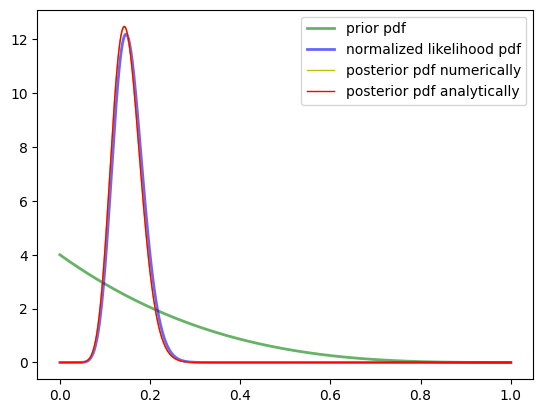

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(theta_grid, prior,
       'g-', lw=2, alpha=0.6, label='prior pdf')

ax.plot(theta_grid, norm_likelihood,
       'b-', lw=2, alpha=0.6, label='normalized likelihood pdf')

ax.plot(theta_grid, post1,
       'y-', lw=1, alpha=1, label='posterior pdf numerically')

ax.plot(theta_grid, post2,
       'r-', lw=1, alpha=1, label='posterior pdf analytically')

ax.legend()

## Subtask 6

In [ ]:

left = beta.ppf(2.5/100, a_post, b_post)
right = beta.ppf(97.5/100, a_post, b_post)

print(f'The central 95% posterior credible interval for θ is [{left}, {right}]')

The central 95% posterior credible interval for θ is [0.09138957252823, 0.21710689824337648]


# Task 2

## Reading and preprocessing the cities

In [120]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
rc('animation', html='jshtml')


In [121]:
!git clone https://github.com/hflabs/city.git

fatal: destination path 'city' already exists and is not an empty directory.


In [122]:
file_path = 'city/city.csv'
df = pd.read_csv(file_path)
df.head(5)

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


Making sure there are only Russian cities.

In [123]:
countries = set(df['country'])
countries

{'Россия'}

Sorting the data frame rows according to their population in decreasing order.

In [124]:
df = df.sort_values(by=['population'], ascending=False)
df.head(5)

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221


Keeping only the first 30 rows of the dataframe

In [125]:
df = df.iloc[:30]
df.shape

(30, 24)

In [126]:
df.isna().sum()

address              0
postal_code          0
country              0
federal_district     0
region_type          0
region               0
area_type           30
area                30
city_type            2
city                 2
settlement_type     30
settlement          30
kladr_id             0
fias_id              0
fias_level           0
capital_marker       0
okato                0
oktmo                0
tax_office           0
timezone             0
geo_lat              0
geo_lon              0
population           0
foundation_year      0
dtype: int64

## Coordinate class

Helper class for coordinates and finding distances

In [127]:
from geopy.distance import geodesic
from typing import List, Type

class Coordinate:
  def __init__(self, lat: float, lon: float):
    self.lon = lon
    self.lat = lat

  def get_tuple(self):
    return (self.lon, self.lat)

  def get_tuple2(self):
    return (self.lat, self.lon)

  @staticmethod
  def get_distance(a, b):
    return geodesic(a.get_tuple2(), b.get_tuple2()).km

  @staticmethod
  def get_total_distance(coords: List):
    total_distance = 0
    for i in range(len(coords)):
      total_distance += Coordinate.get_distance(coords[i], coords[i - 1])

    return total_distance

## Simulated Annealing

In [128]:
org_cities = [Coordinate(row['geo_lat'], row['geo_lon']) for _, row in df.iterrows()]

In [129]:
print(Coordinate.get_distance(org_cities[0], org_cities[1]))
print(Coordinate.get_total_distance(org_cities))

636.0231024849256
65368.52652203771


In [130]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
class SimulatedAnnealing:
  def __init__(self, org_cities, factor, temp_init=30, num_markov_chains=200, 
               chain_length=100):
    self.temp_init = temp_init # initial temperature
    self.factor = factor # temperature decay factor
    self.num_markov_chains = num_markov_chains
    self.chain_length = chain_length
    self.org_cities = org_cities

  def choose_two_random_cities(self):
    radnom_city1 = np.random.randint(0, len(self.org_cities))
    radnom_city2 = radnom_city1
    while radnom_city2 == radnom_city1:
      radnom_city2 = np.random.randint(0, len(self.org_cities))

    return radnom_city1, radnom_city2


  def run(self, save_rate=20):
    cities = self.org_cities[:]
    cost = Coordinate.get_total_distance(cities)

    costs_list = []
    cities_list = []
    current_step = 0
    temp = self.temp_init
    acceptance_rate = 0

    for i in range(self.num_markov_chains):

      if i:
        temp *= self.factor
      for j in range(self.chain_length):
        did_accept = False
        radnom_city1, radnom_city2 = self.choose_two_random_cities()

        cities[radnom_city1], cities[radnom_city2] = cities[radnom_city2], cities[radnom_city1]

        new_cost = Coordinate.get_total_distance(cities)
        # accept the new path
        if new_cost < cost:
          cost = new_cost
          did_accept = True
        else:
          # accept the new path with an exponential probability relying on the temperature
          # to avoid staying in a local minima
          x = np.random.uniform()
          pr = np.exp((cost - new_cost) / temp)
          if x < pr:
            cost = new_cost
            did_accept = True
          else:
            # reject and revert and the swap
            cities[radnom_city1], cities[radnom_city2] = cities[radnom_city2], cities[radnom_city1]
        
        if did_accept:
          acceptance_rate += 1
        
        if current_step % save_rate == 0:
          costs_list.append(cost)
          cities_list.append(cities[:])
        current_step += 1


    acceptance_rate = acceptance_rate / (self.chain_length * self.chain_length)

    return dict(last_path=cities, last_cost=cost, paths_list=cities_list, 
                costs_list=costs_list, save_rate=save_rate)

In [132]:

from matplotlib.animation import PillowWriter, FuncAnimation

fast_cooling_factor = 0.75
mid_cooling_factor = 0.85
slow_cooling_factor = 0.99

num_markov_chains, chain_length = 200, 100

fast_cooling_results = SimulatedAnnealing(org_cities, fast_cooling_factor).run()
mid_cooling_results = SimulatedAnnealing(org_cities, mid_cooling_factor).run()
slow_cooling_results = SimulatedAnnealing(org_cities, slow_cooling_factor).run()

results = dict(fast=fast_cooling_results, mid=mid_cooling_results, 
               slow=slow_cooling_results)


In [133]:
cooling_results_list = [fast_cooling_results, mid_cooling_results, slow_cooling_results]

### Visualization

#### Animation to an mp4 video.

Cities and world

In [134]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['geo_lon'], df['geo_lat'])]
gdf = GeoDataFrame(df, geometry=geometry) 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Note: this figure is only used for creating the animation.

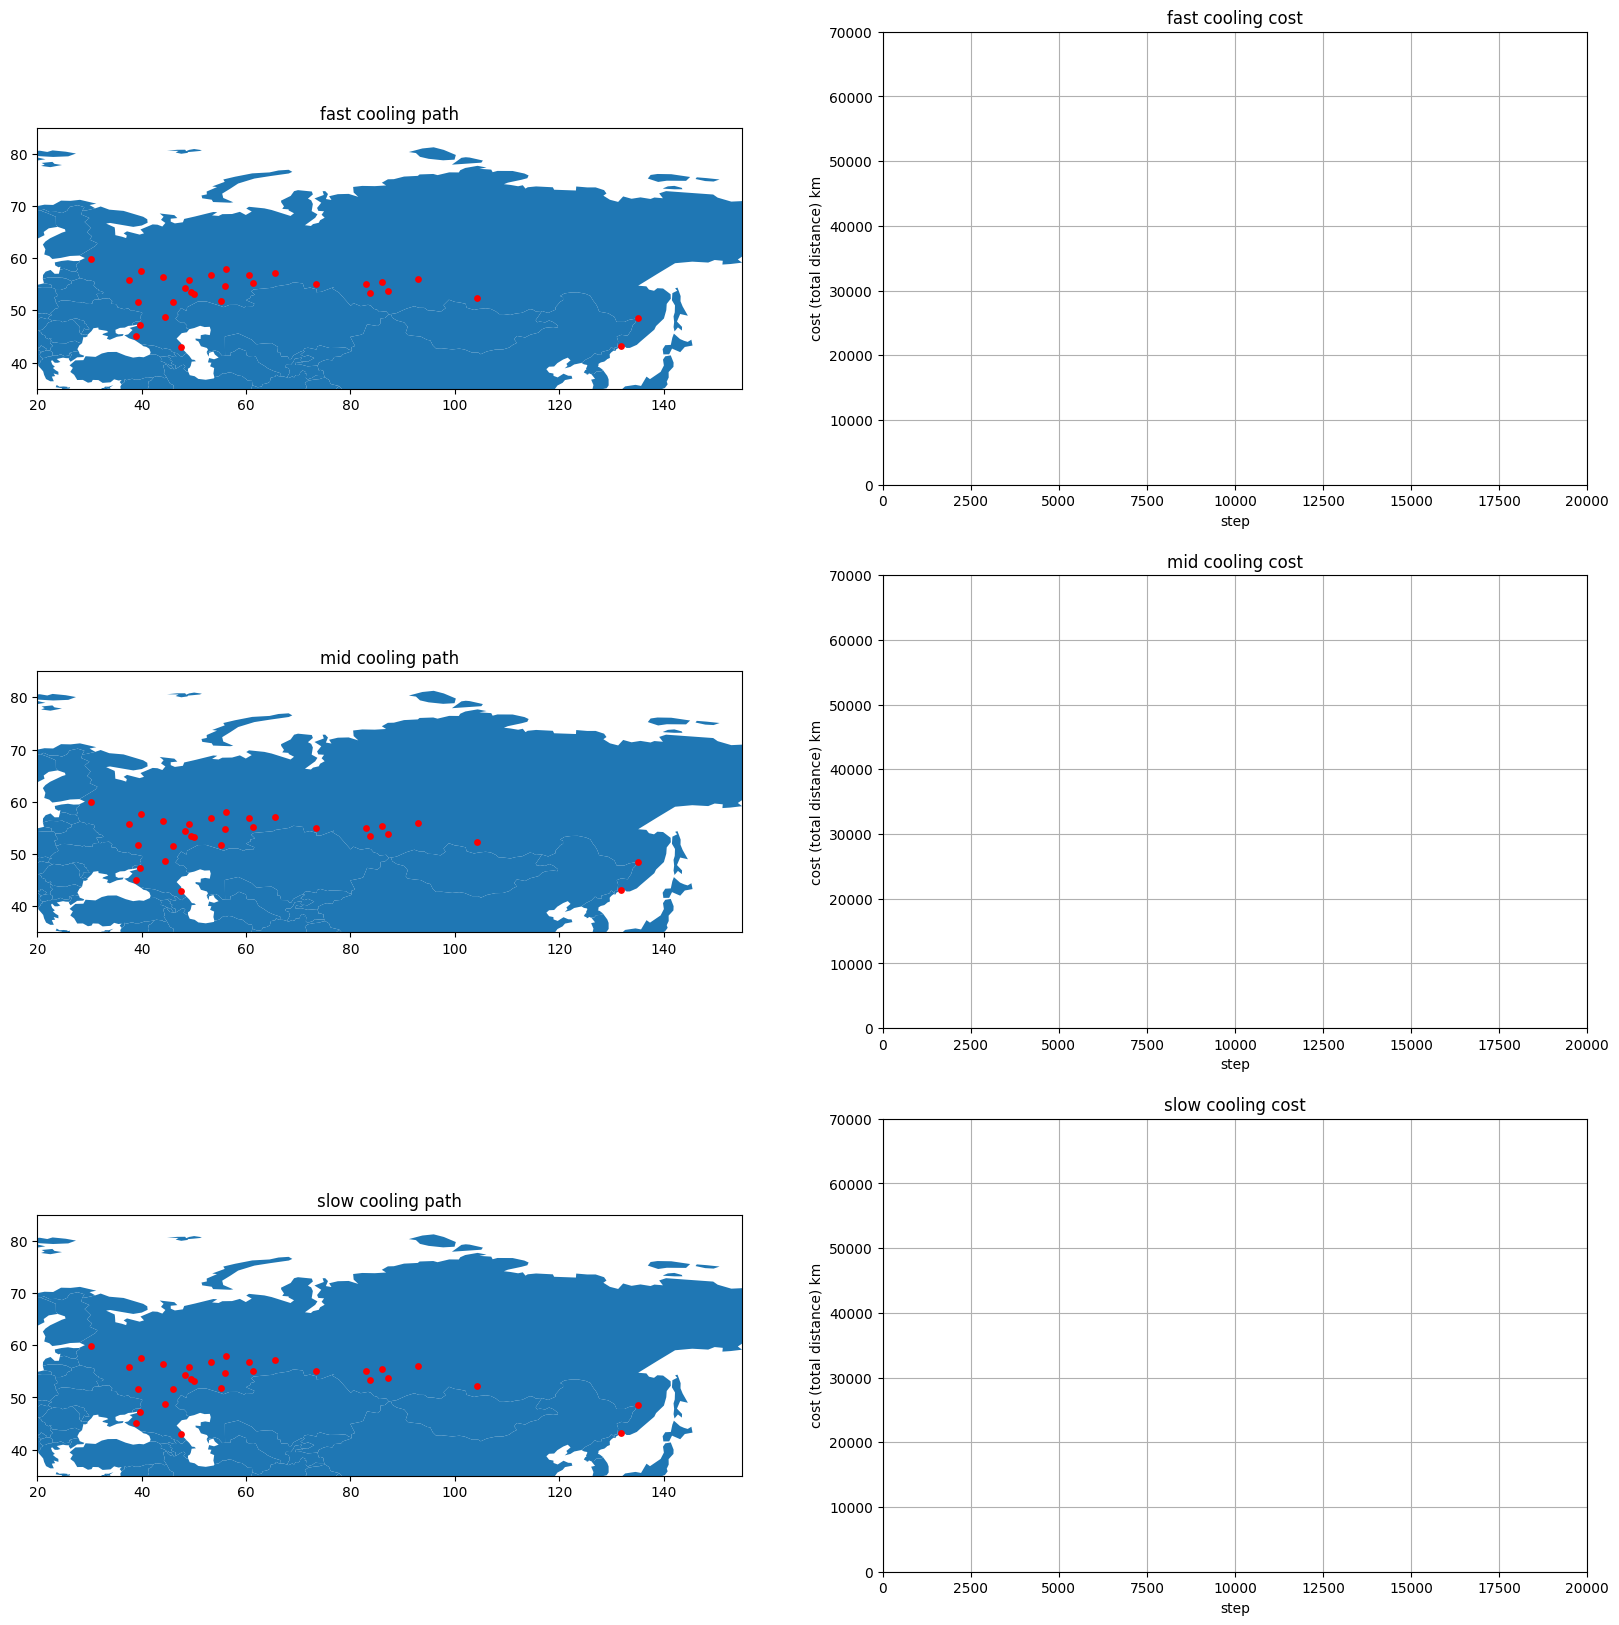

In [135]:


fig, axs = plt.subplots(3, 2, figsize=(20, 20)) # creating a figure

((fast_ax, fast_ax2), (mid_ax, mid_ax2), 
      (slow_ax, slow_ax2)) = axs

names = ['fast', 'mid', 'slow']

step_lists = [[], [], []]
cost_lists = [[], [], []]
cost_lines = [0, 0, 0]

path_lines = [[], [], []]

def handle_cost_graph(subplot, m):
  subplot.set_title(f'{names[m]} cooling cost') # title

  xmin, xmax = 0, num_markov_chains * chain_length + 5
  ymin, ymax = 0, 70000
  pad = 0.5
  subplot.set_xlim(xmin-pad, xmax+pad)
  subplot.set_ylim(ymin-pad, ymax+pad)
  subplot.set_xlabel('step')
  subplot.set_ylabel('cost (total distance) km')
  
  l, = subplot.plot(step_lists[m], cost_lists[m])
  cost_lines[m] = l

  subplot.grid()

def handle_path_graph(subplot, m):
  subplot.set_title(f'{names[m]} cooling path') # title
  world.plot(ax=subplot) # ploting the world

  xmin, ymin, xmax, ymax = 25, 40, 150, 80 # set limits for Russia
  pad = 5 
  subplot.set_xlim(xmin-pad, xmax+pad)
  subplot.set_ylim(ymin-pad, ymax+pad)
  gdf.plot(ax=subplot, marker='o', color='red', markersize=15) # plotting the cities
  # plot intial path
  
  for _ in range(len(org_cities)):
    l, = subplot.plot([], [], 'y')
    path_lines[m].append(l)
 
for (m,n), subplot in np.ndenumerate(axs):
  if n % 2:
    handle_cost_graph(subplot, m)
  else:
    handle_path_graph(subplot, m)

In [136]:


def update(index):

  def update_cost(subplot, m):
    cost_lists[m].append(cooling_results_list[m]['costs_list'][index])
    save_rate = cooling_results_list[m]['save_rate']

    if len(step_lists[m]) == 0:
      step_lists[m].append(0)
    else:
      step_lists[m].append(step_lists[m][-1] + save_rate)

    cost_lines[m].set_data(step_lists[m], cost_lists[m])

  def update_path(subplot, m):

    path = cooling_results_list[m]['paths_list'][index]

    for i in range(len(path)):
      line = path_lines[m][i]

      city1 = path[i - 1].get_tuple()
      city2 = path[i].get_tuple()
      x_values = [city1[0], city2[0]]
      y_values = [city1[1], city2[1]]
      
      line.set_data(x_values, y_values)

  for (m,n), subplot in np.ndenumerate(axs):
    if n % 2: # cost graph
      update_cost(subplot, m)
    else:
      update_path(subplot, m)


In [137]:
print(cooling_results_list[0]['last_cost'])

19626.665745005062


In [138]:
from matplotlib import animation

save_rate = cooling_results_list[0]['save_rate']

all_ani = FuncAnimation(fig, update, num_markov_chains * chain_length // save_rate)  


In [139]:
from matplotlib import animation

dpi = 50

writer = animation.writers['ffmpeg'](fps=30)
all_ani.save('test.mp4',writer=writer,dpi=dpi)


#### Cost graphs per cooling approach

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180, 2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2920, 2940, 2960, 2980, 3000, 3020, 3040, 3060, 3080, 3100, 3120, 3140, 3160, 3180, 3200, 3220, 3240, 3260, 3280, 3300, 3320, 3340, 3360, 3380, 3400, 3420, 3440, 3460, 3480, 3500,

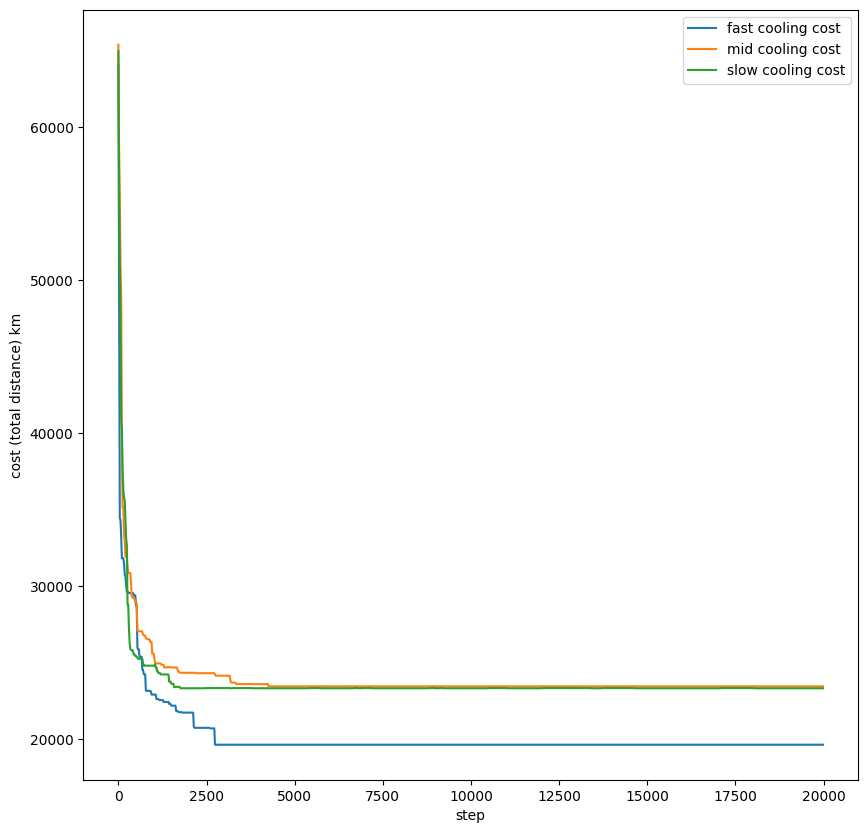

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) # creating a figure

ax.set_xlabel('step')
ax.set_ylabel('cost (total distance) km')

steps = list(range(0,  num_markov_chains * chain_length, save_rate))
print(steps)

for i, cooling_res in enumerate(cooling_results_list):

  costs = cooling_results_list[i]['costs_list']
  ax.plot(steps, costs, label=f'{names[i]} cooling cost')
  
plt.legend()
plt.show()